In [2]:
#import argparse
#import bz2
#import xml.etree.ElementTree as ET
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import numpy as np

#import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


In [3]:
#読み込み
import_data_pd = pickle.load(open("import_test_pd_last.sav","rb"))
import_data_pd

company  wiki_id category_id  \
0                  富士通     1314        3650   
1                 シャープ     1531        3650   
2                 バンダイ     1811        3800   
3                 日本電気     2173        3650   
4              マイクロソフト     2454        5250   
5                   三越     3393        6100   
6                新京成電鉄     3580        5050   
7                りそな銀行     3911        7050   
8           スルッとKANSAI     3935        9050   
9             東京臨海高速鉄道     3982        5050   
10              NTTドコモ     4495        5250   
11         名古屋グランパスエイト     4666        9050   
12            鹿島アントラーズ     4670        9050   
13         浦和レッドダイヤモンズ     4673        9050   
14             清水エスパルス     4681        9050   
15               ガンバ大阪     4685        9050   
16              ジュビロ磐田     4694        9050   
17             湘南ベルマーレ     4699        9050   
18              セレッソ大阪     4711        9050   
19           京都サンガF.C.     4712        9050   
20             ヴィッセル神戸     4714        9050   
21         北海道コンサドーレ札幌     4720        9050   
22                横浜FC     4757        9050   
23           水戸ホーリーホック     4839        9050   
24               サガン鳥栖     4879        9050   
25             スタジオジブリ     5444        5250   
26               パイオニア     6032        3650   
27       ブックオフコーポレーション     6930        6100   
28                西武鉄道     7550        5050   
29              第一勧業銀行     7835        7050   
...                ...      ...         ...   
11310     浜千鳥(日本酒メーカー)  3905669        3050   
11311         三桃食品東北工場  3906945        3050   
11312         三桃食品九州工場  3906957        3050   
11313         三桃食品四国工場  3907006        3050   
11314              MJG  3907662        9050   
11315          丸善インテック  3908182        6050   
11316            DANDY  3908775        5250   
11317  第四北越フィナンシャルグループ  3909001        7050   
11318       結婚相談所サンマリエ  3911347        9050   
11319             白石工業  3911393        3200   
11320          白石カルシウム  3911410        6050   
11321          白石中央研究所  3911415        9050   
11322           ロッコーマン  3912568        6050   
11323       アーミッシュ(企業)  3914324        6100   
11324        札幌みらい中央青果  3914392        6050   
11325             ウノフク  3915000        3100   
11326        豊田通商システムズ  3916166        5250   
11327           ホールハート  3917770        9050   
11328        ファルーカモデルズ  3917783        9050   
11329           証券ジャパン  3918704        7100   
11330      ラティス・テクノロジー  3920141        5250   
11331      ダイナミックマップ基盤  3921804        5250   
11332             上羽絵惣  3923779        3800   
11333              京盛宇  3924545        3050   
11334         東研サーモテック  3926624        3550   
11335            味の素食品  3926732        3050   
11336              つえ屋  3927143        3800   
11337             かましん  3927635        6100   
11338            ASフーズ  3928089        3050   
11339          参創ハウテック  3928349        2050   

                                                    text  
0      日本の総合エレクトロニクスメーカーであり、総合ITベンダーである。ITサービス提供企業として...  
1      日本・大阪府堺市に拠点を置く、台湾・鴻海精密工業傘下の電機メーカー。精度=2016-12#沿...  
2      バンダイナムコグループの玩具、模型、既製服（アパレル）、生活用品等を手がけるメーカー。「変身...  
3      東京都港区芝五丁目に本社を置く住友グループの電機メーカー。当社グループの工場が進出したことを...  
4      アメリカ合衆国ワシントン州に本社を置く、ソフトウェアを開発・販売する会社である。1975年に...  
5      株式会社三越伊勢丹ホールディングス傘下の株式会社三越伊勢丹が運営する日本の百貨店。また、株式...  
6      千葉県東葛地域に1路線（新京成線）を有する鉄道会社。京成グループの会社（持分法適用関連会社）...  
7      本店を大阪府大阪市中央区に置く、りそなホールディングス傘下の都市銀行。国内で唯一、信託部門を...  
8      近畿圏を中心とする西日本の公共交通機関のストアードフェアシステム及び周遊券のネットワーク、ま...  
9      東京都でりんかい線を運営している鉄道会社。東京都が90%以上出資する第三セクター方式で設立さ...  
10     携帯電話等の無線通信サービスを提供する日本の最大手移動体通信事業者である。日本電信電話株式会...  
11     日本の名古屋市、豊田市、みよし市を中心とする愛知県全県をホームタウンとする2007年5月15...  
12     日本の茨城県鹿嶋市、神栖市、潮来市、行方市、鉾田市をホームタウンとする、日本プロサッカーリー...  
13     日本の埼玉県さいたま市をホームタウンとする、日本プロサッカーリーグ（Jリーグ）に加盟するプロ...  
14     日本の静岡県静岡市をホームタウンとする、日本プロサッカーリーグ（Jリーグ）に加盟するプロサッ...  
15     日本の大阪府吹田市、茨木市、高槻市、豊中市、池田市、摂津市、箕面市をホームタウンとする、日本...  
16     日本の静岡県磐田市をホームタウンとする、日本プロサッカーリーグ（Jリーグ）に加盟するプロサッ...  
17     日本の神奈川県厚木市、伊勢原市、小田原市、茅ヶ崎市、秦野市、平

In [4]:
import_data_pd = import_data_pd[import_data_pd['text'] != ''].reset_index(drop=True)

In [5]:
import_data_pd = import_data_pd[import_data_pd['text'].apply(lambda x: len(x)>50)].reset_index(drop=True)

In [6]:
import_data_pd["text"][3883]

'福岡県福岡市中央区に本社を置く不動産管理やソフトウェア開発を行う企業の持株会社。福岡証券取引所Q-Board市場上場銘柄のひとつである（証券コードは4827）。業種に特化した汎用パッケージ製品を市場に投入し、近年では汎用パッケージのカスタマイズや大手企業の専用システムの受託開発などを手掛けている。主要取引先には株式会社リコーや株式会社大塚商会、キヤノンマーケティングジャパン株式会社など大手複合機メーカーがある。不動産管理、パッケージソフトウェアの開発販売など。'

In [7]:
pickle.dump(import_data_pd,open("import_data_pd_max.sav","wb"))

In [8]:
# テキストから不要な要素を取り除く
from janome.tokenizer import Tokenizer
from janome.analyzer import Analyzer
from janome.charfilter import *
from janome.tokenfilter import *
jt = Tokenizer()


class NumericReplaceFilter(TokenFilter):
    """
    名詞中の数(漢数字を含む)を全て0に置き換えるTokenFilterの実装
    
    Parameters
    ----------
    text : TokenFilter
        前処理する日本語の文字列

    Returns
    -------
    token : str
        前処理した日本語の文字列
    """
    def apply(self, tokens):
        for token in tokens:
            parts = token.part_of_speech.split(',')
            if (parts[0] == '名詞' and parts[1] == '数'):
                token.surface = '0'
                token.base_form = '0'
                token.reading = 'ゼロ'
                token.phonetic = 'ゼロ'
            yield token

In [9]:
char_filters = [UnicodeNormalizeCharFilter()]
#token_filters = [NumericReplaceFilter(),POSKeepFilter(['名詞,固有名詞']), LowerCaseFilter()]
token_filters = [NumericReplaceFilter(),POSKeepFilter(['名詞,一般','名詞,固有名詞']), LowerCaseFilter()]
#token_filters = [NumericReplaceFilter(),LowerCaseFilter()]

tokenizer = Tokenizer('dic_df.csv', udic_enc='cp932')
a = Analyzer(char_filters, tokenizer, token_filters)


def clean_text(text):
    """
    日本語の文字列を前処理する

    Parameters
    ----------
    text : str
        前処理する日本語の文字列

    Returns
    -------
    cleand_text : str
        前処理した日本語の文字列
    """
    replaced_text = '\n'.join(s.strip() for s in text.splitlines() if s != '')  # skip header by [2:]
    replaced_text = replaced_text.lower()
    #replaced_text = re.sub(r'[【】]', ' ', replaced_text)       # 【】の除去
    #replaced_text = re.sub(r'[（）()]', ' ', replaced_text)     # （）の除去
    #replaced_text = re.sub(r'[［］\[\]]', ' ', replaced_text)   # ［］の除去
    replaced_text = re.sub(r'[@＠]\w+', '', replaced_text)  # メンションの除去
    replaced_text = re.sub(r'https?:\/\/.*?[\r\n ]', '', replaced_text)  # URLの除去

    soup = BeautifulSoup(replaced_text, 'html.parser')
    cleaned_text = soup.get_text()
    cleaned_text = ''.join(cleaned_text.splitlines())
    
    cleaned_text = re.sub("'''", '', cleaned_text)
    cleaned_text = re.sub("\|", '', cleaned_text)
    cleaned_text = re.sub(r'\<ref.*?\<\/ref\>', '', cleaned_text)
    cleaned_text = re.sub(r'\{\{.*?\}\}', '', cleaned_text)
    cleaned_text = re.sub(r'\<.*?\>', '', cleaned_text)
    cleaned_text = re.sub(r' ', '', cleaned_text)
    cleaned_text = re.sub(r'　', '', cleaned_text)
    cleaned_text = re.sub(r'[a-z]{8,}', '', cleaned_text)
    
    return cleaned_text


def convert_sentence_to_words(sentence):
    #stopwords = ["i", "a", "an", "the", "and", "or", "if", "is", "are", "am", "it", "this", "that", "of", "from", "in", "on"]
    sentence = sentence.lower() # 小文字化
    sentence = sentence.replace("\n", "") # 改行削除
    sentence = re.sub(re.compile("[!-\/:-@[-`{-~]"), " ", sentence) # 記号をスペースに置き換える
    sentence = sentence.split(" ") # スペースで区切る
    sentence_words = []
    for word in sentence:
        if (re.compile(r"^.*[0-9]+.*$").fullmatch(word) is not None):
            continue
        #if word in stopwords:
        #    continue
        sentence_words.append(word)
    return sentence_words

def janome_preprocessing(text):
    """
    前処理と形態素解析をする

    Parameters
    ----------
    text : str
        前処理する日本語の文字列

    Returns
    -------
    text_list : list[str]
        形態素解析後の文字列のリスト
    """
    text_list = []
    
    for token in a.analyze(text):
        text_list.append(token.surface)
        #text_list.append(translator.translate(translator.translate(token.surface).text, dest='ja').text)
        
    return text_list

# 単語をIDに変換する単語辞書を生成する
def create_word_id_dict(sentence_list):
    word_to_id = {}
    for sentence in sentence_list:
        sentence_words = janome_preprocessing(sentence)
        for word in sentence_words:
            if word not in word_to_id:
                word_to_id[word] = len(word_to_id)
    return word_to_id

In [10]:
import_data_list = import_data_pd["text"].values.tolist()

In [11]:
sentence_list = []
for data in import_data_list:
    if len(sentence_list)%1000 == 0:
        print(len(sentence_list))
    sentence_list.append(' '.join(janome_preprocessing(data)))
    #sentence_list.append(''.join(janome_preprocessing(data)))
    

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000


In [12]:
#保存
pickle.dump(sentence_list,open("sentence_list.sav","wb"))

In [6]:
#読み込み
sentence_list = pickle.load(open("sentence_list.sav","rb"))

In [14]:
len(sentence_list)

11045

In [8]:
t = Tokenizer()

for token in t.tokenize(import_data_pd["text"][3]):
    print(token)

理化学研究所	名詞,固有名詞,組織,*,*,*,理化学研究所,リカガクケンキュウショ,リカガクケンキューショ
と	助詞,格助詞,一般,*,*,*,と,ト,ト
共同	名詞,サ変接続,*,*,*,*,共同,キョウドウ,キョードー
開発	名詞,サ変接続,*,*,*,*,開発,カイハツ,カイハツ
し	動詞,自立,*,*,サ変・スル,連用形,する,シ,シ
た	助動詞,*,*,*,特殊・タ,基本形,た,タ,タ
スーパーコンピュータ	名詞,一般,*,*,*,*,スーパーコンピュータ,スーパーコンピュータ,スーパーコンピュータ
「	記号,括弧開,*,*,*,*,「,「,「
京	名詞,固有名詞,人名,姓,*,*,京,キョウ,キョー
スーパーコンピュータ	名詞,一般,*,*,*,*,スーパーコンピュータ,スーパーコンピュータ,スーパーコンピュータ
京	名詞,固有名詞,地域,一般,*,*,京,キョウ,キョー
けい	名詞,一般,*,*,*,*,けい,ケイ,ケイ
」	記号,括弧閉,*,*,*,*,」,」,」
が	助詞,格助詞,一般,*,*,*,が,ガ,ガ
、	記号,読点,*,*,*,*,、,、,、
計算	名詞,サ変接続,*,*,*,*,計算,ケイサン,ケイサン
速度	名詞,一般,*,*,*,*,速度,ソクド,ソクド
の	助詞,連体化,*,*,*,*,の,ノ,ノ
ランキング	名詞,一般,*,*,*,*,ランキング,ランキング,ランキング
で	助詞,格助詞,一般,*,*,*,で,デ,デ
世界	名詞,一般,*,*,*,*,世界,セカイ,セカイ
首位	名詞,一般,*,*,*,*,首位,シュイ,シュイ
を	助詞,格助詞,一般,*,*,*,を,ヲ,ヲ
獲得	名詞,サ変接続,*,*,*,*,獲得,カクトク,カクトク
2011	名詞,数,*,*,*,*,2011,*,*
年	名詞,接尾,助数詞,*,*,*,年,ネン,ネン
時点	名詞,一般,*,*,*,*,時点,ジテン,ジテン
。	記号,句点,*,*,*,*,。,。,。
また	接続詞,*,*,*,*,*,また,マタ,マタ
「	記号,括弧開,*,*,*,*,「,「,「
非	接頭詞,名詞接続,*,*,*,*,非,ヒ,ヒ
接触	名詞,サ変接続,*,*,*,*,接触,セッショク,セッショク
型	名詞,接尾,一般,*,*,*,型,ガタ,ガタ
手のひら	名詞,一般,*,

In [20]:
docs = np.array(sentence_list)
docs.shape

(9692,)

In [21]:
X = pd.DataFrame(docs)

In [22]:
Y = import_data_pd["category_od"]

In [23]:
N_train = int(len(X.index) * 0.8)
N_test = len(X.index) - N_train

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=N_test,shuffle = True)

In [24]:
docs_train = np.reshape(X_train.as_matrix(),(len(X_train.index)))
docs_train.shape

C:\Users\tamura\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


(7753,)

In [167]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(token_pattern=u'(?u)\\b\\w+\\b')
vecs = vectorizer.fit_transform(docs_train)

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(use_idf=True, token_pattern=u'(?u)\\b\\w+\\b')
vecs_train = vectorizer.fit_transform(docs_train)

In [26]:
len(vectorizer.get_feature_names())

41428

In [27]:
X_train = pd.DataFrame(vecs_train.toarray())
X_train.columns = vectorizer.get_feature_names()
X_train

a   aa  aaa  aac  aacsb  aajr  aaku  aap  aard   ab  ...   龍野  \
0     0.000000  0.0  0.0  0.0    0.0   0.0   0.0  0.0   0.0  0.0  ...  0.0   
1     0.000000  0.0  0.0  0.0    0.0   0.0   0.0  0.0   0.0  0.0  ...  0.0   
2     0.000000  0.0  0.0  0.0    0.0   0.0   0.0  0.0   0.0  0.0  ...  0.0   
3     0.000000  0.0  0.0  0.0    0.0   0.0   0.0  0.0   0.0  0.0  ...  0.0   
4     0.157185  0.0  0.0  0.0    0.0   0.0   0.0  0.0   0.0  0.0  ...  0.0   
5     0.000000  0.0  0.0  0.0    0.0   0.0   0.0  0.0   0.0  0.0  ...  0.0   
6     0.000000  0.0  0.0  0.0    0.0   0.0   0.0  0.0   0.0  0.0  ...  0.0   
7     0.000000  0.0  0.0  0.0    0.0   0.0   0.0  0.0   0.0  0.0  ...  0.0   
8     0.000000  0.0  0.0  0.0    0.0   0.0   0.0  0.0   0.0  0.0  ...  0.0   
9     0.000000  0.0  0.0  0.0    0.0   0.0   0.0  0.0   0.0  0.0  ...  0.0   
10    0.000000  0.0  0.0  0.0    0.0   0.0   0.0  0.0   0.0  0.0  ...  0.0   
11    0.000000  0.0  0.0  0.0    0.0   0.0   0.0  0.0   0.0  0.0  ...  0.0   
12    0.000000  0.0  0.0  0.0    0.0   0.0   0.0  0.0   0.0  0.0  ...  0.0   
13    0.000000  0.0  0.0  0.0    0.0   0.0   0.0  0.0   0.0  0.0  ...  0.0   
14    0.000000  0.0  0.0  0.0    0.0   0.0   0.0  0.0   0.0  0.0  ...  0.0   
15    0.000000  0.0  0.0  0.0    0.0   0.0   0.0  0.0   0.0  0.0  ...  0.0   
16    0.000000  0.0  0.0  0.0    0.0   0.0   0.0  0.0   0.0  0.0  ...  0.0   
17    0.000000  0.0  0.0  0.0    0.0   0.0   0.0  0.0   0.0  0.0  ...  0.0   
18    0.000000  0.0  0.0  0.0    0.0   0.0   0.0  0.0   0.0  0.0  ...  0.0   
19    0.000000  0.0  0.0  0.0    0.0   0.0   0.0  0.0   0.0  0.0  ...  0.0   
20    0.000000  0.0  0.0  0.0    0.0   0.0   0.0  0.0   0.0  0.0  ...  0.0   
21    0.000000  0.0  0.0  0.0    0.0   0.0   0.0  0.0   0.0  0.0  ...  0.0   
22    0.000000  0.0  0.0  0.0    0.0   0.0   0.0  0.0   0.0  0.0  ...  0.0   
23    0.000000  0.0  0.0  0.0    0.0   0.0   0.0  0.0   0.0  0.0  ...  0.0   
24    0.000000  0.0  0.0  0.0    0.0   0.0   0.0  0.0   0.0  0.0  ...  0.0   
25    0.000000  0.0  0.0  0.0    0.0   0.0   0.0  0.0   0.0  0.0  ...  0.0   
26    0.000000  0.0  0.0  0.0    0.0   0.0   0.0  0.0   0.0  0.0  ...  0.0   
27    0.000000  0.0  0.0  0.0    0.0   0.0   0.0  0.0   0.0  0.0  ...  0.0   
28    0.000000  0.0  0.0  0.0    0.0   0.0   0.0  0.0   0.0  0.0  ...  0.0   
29    0.000000  0.0  0.0  0.0    0.0   0.0   0.0  0.0   0.0  0.0  ...  0.0   
...        ...  ...  ...  ...    ...   ...   ...  ...   ...  ...  ...  ...   
7723  0.000000  0.0  0.0  0.0    0.0   0.0   0.0  0.0   0.0  0.0  ...  0.0   
7724  0.000000  0.0  0.0  0.0    0.0   0.0   0.0  0.0   0.0  0.0  ...  0.0   
7725  0.000000  0.0  0.0  0.0    0.0   0.0   0.0  0.0   0.0  0.0  ...  0.0   
7726  0.000000  0.0  0.0  0.0    0.0   0.0   0.0  0.0   0.0  0.0  ...  0.0   
7727  0.000000  0.0  0.0  0.0    0.0   0.0   0.0  0.0   0.0  0.0  ...  0.0   
7728  0.000000  0.0  0.0  0.0    0.0   0.0   0.0  0.0   0.0  0.0  ...  0.0   
7729  0.000000  0.0  0.0  0.0    0.0   0.0   0.0  0.0   0.0  0.0  ...  0.0   
7730  0.000000  0.0  0.0  0.0    0.0   0.0   0.0  0.0   0.0  0.0  ...  0.0   
7731  0.000000  0.0  0.0  0.0    0.0   0.0   0.0  0.0   0.0  0.0  ...  0.0   
7732  0.000000  0.0  0.0  0.0    0.0   0.0   0.0  0.0   0.0  0.0  ...  0.0   
7733  0.000000  0.0  0.0  0.0    0.0   0.0   0.0  0.0   0.0  0.0  ...  0.0   
7734  0.000000  0.0  0.0  0.0    0.0   0.0   0.0  0.0   0.0  0.0  ...  0.0   
7735  0.000000  0.0  0.0  0.0    0.0   0.0   0.0  0.0   0.0  0.0  ...  0.0   
7736  0.000000  0.0  0.0  0.0    0.0   0.0   0.0  0.0   0.0  0.0  ...  0.0   
7737  0.000000  0.0  0.0  0.0    0.0   0.0   0.0  0.0   0.0  0.0  ...  0.0   
7738  0.000000  0.0  0.0  0.0    0.0   0.0   0.0  0.0   0.0  0.0  ...  0.0   
7739  0.000000  0.0  0.0  0.0    0.0   0.0   0.0  0.0   0.0  0.0  ...  0.0   
7740  0.000000  0.0  0.0  0.0    0.0   0.0   0.0  0.0   0.0  0.0  ...  0.0   
7741  0.000000  0.0  0.0  0.0    0.0   0.0   0.0  0.0   0.0  0.0  ...  0.0   
7742  0.000000  0.0  0.0  0.0    0.

In [108]:
tuned_parameters = {'n_estimators':[300],'max_features':[1]}
clf = GridSearchCV(
    RandomForestClassifier(), # 識別器
    tuned_parameters, # 最適化したいパラメータセット 
    cv=1, # 交差検定の回数
    scoring='accuracy', 
    n_jobs=-1) 

In [42]:
#clf = RandomForestClassifier(n_estimators=300, max_features=3)
clf = RandomForestClassifier(n_estimators=300)

In [57]:
clf_trained = clf.fit(X_train, Y_train)

In [58]:
#特徴量確認
import matplotlib.pyplot as plt
%matplotlib inline

features = X_train.columns
importances = clf.feature_importances_
indices = np.argsort(importances)

In [59]:
from matplotlib.font_manager import FontProperties
fp = FontProperties(fname=r'c:\Windows\Fonts\meiryo.ttc')

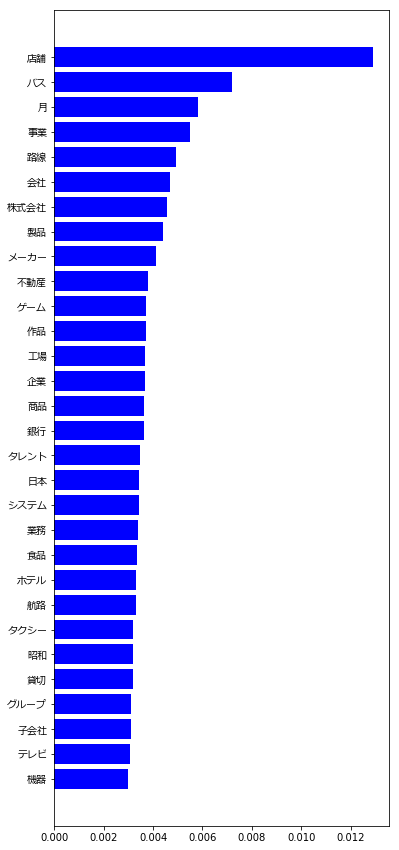

In [60]:
indices_slice = indices[-30::]

plt.figure(figsize=(6,15))
plt.barh(range(len(indices_slice)),importances[indices_slice],color="b",align="center")
plt.yticks(range(len(indices_slice)),features[indices_slice],fontproperties=fp)
plt.show()

In [61]:
docs_test = X_test.as_matrix()
docs_test = np.reshape(docs_test,(len(docs_test)))
vecs_test = vectorizer.transform(docs_test)

C:\Users\tamura\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [62]:
X_test_df = pd.DataFrame(vecs_test.toarray())
X_test_df.columns = vectorizer.get_feature_names()
X_test_df

a   aa  aaa  aac  aacsb  aajr  aaku  aap  aard   ab  ...   龍野  \
0     0.000000  0.0  0.0  0.0    0.0   0.0   0.0  0.0   0.0  0.0  ...  0.0   
1     0.000000  0.0  0.0  0.0    0.0   0.0   0.0  0.0   0.0  0.0  ...  0.0   
2     0.000000  0.0  0.0  0.0    0.0   0.0   0.0  0.0   0.0  0.0  ...  0.0   
3     0.000000  0.0  0.0  0.0    0.0   0.0   0.0  0.0   0.0  0.0  ...  0.0   
4     0.000000  0.0  0.0  0.0    0.0   0.0   0.0  0.0   0.0  0.0  ...  0.0   
5     0.000000  0.0  0.0  0.0    0.0   0.0   0.0  0.0   0.0  0.0  ...  0.0   
6     0.000000  0.0  0.0  0.0    0.0   0.0   0.0  0.0   0.0  0.0  ...  0.0   
7     0.000000  0.0  0.0  0.0    0.0   0.0   0.0  0.0   0.0  0.0  ...  0.0   
8     0.000000  0.0  0.0  0.0    0.0   0.0   0.0  0.0   0.0  0.0  ...  0.0   
9     0.000000  0.0  0.0  0.0    0.0   0.0   0.0  0.0   0.0  0.0  ...  0.0   
10    0.000000  0.0  0.0  0.0    0.0   0.0   0.0  0.0   0.0  0.0  ...  0.0   
11    0.000000  0.0  0.0  0.0    0.0   0.0   0.0  0.0   0.0  0.0  ...  0.0   
12    0.000000  0.0  0.0  0.0    0.0   0.0   0.0  0.0   0.0  0.0  ...  0.0   
13    0.000000  0.0  0.0  0.0    0.0   0.0   0.0  0.0   0.0  0.0  ...  0.0   
14    0.000000  0.0  0.0  0.0    0.0   0.0   0.0  0.0   0.0  0.0  ...  0.0   
15    0.000000  0.0  0.0  0.0    0.0   0.0   0.0  0.0   0.0  0.0  ...  0.0   
16    0.000000  0.0  0.0  0.0    0.0   0.0   0.0  0.0   0.0  0.0  ...  0.0   
17    0.000000  0.0  0.0  0.0    0.0   0.0   0.0  0.0   0.0  0.0  ...  0.0   
18    0.015508  0.0  0.0  0.0    0.0   0.0   0.0  0.0   0.0  0.0  ...  0.0   
19    0.000000  0.0  0.0  0.0    0.0   0.0   0.0  0.0   0.0  0.0  ...  0.0   
20    0.000000  0.0  0.0  0.0    0.0   0.0   0.0  0.0   0.0  0.0  ...  0.0   
21    0.000000  0.0  0.0  0.0    0.0   0.0   0.0  0.0   0.0  0.0  ...  0.0   
22    0.000000  0.0  0.0  0.0    0.0   0.0   0.0  0.0   0.0  0.0  ...  0.0   
23    0.000000  0.0  0.0  0.0    0.0   0.0   0.0  0.0   0.0  0.0  ...  0.0   
24    0.000000  0.0  0.0  0.0    0.0   0.0   0.0  0.0   0.0  0.0  ...  0.0   
25    0.000000  0.0  0.0  0.0    0.0   0.0   0.0  0.0   0.0  0.0  ...  0.0   
26    0.000000  0.0  0.0  0.0    0.0   0.0   0.0  0.0   0.0  0.0  ...  0.0   
27    0.000000  0.0  0.0  0.0    0.0   0.0   0.0  0.0   0.0  0.0  ...  0.0   
28    0.000000  0.0  0.0  0.0    0.0   0.0   0.0  0.0   0.0  0.0  ...  0.0   
29    0.000000  0.0  0.0  0.0    0.0   0.0   0.0  0.0   0.0  0.0  ...  0.0   
...        ...  ...  ...  ...    ...   ...   ...  ...   ...  ...  ...  ...   
1909  0.000000  0.0  0.0  0.0    0.0   0.0   0.0  0.0   0.0  0.0  ...  0.0   
1910  0.000000  0.0  0.0  0.0    0.0   0.0   0.0  0.0   0.0  0.0  ...  0.0   
1911  0.000000  0.0  0.0  0.0    0.0   0.0   0.0  0.0   0.0  0.0  ...  0.0   
1912  0.000000  0.0  0.0  0.0    0.0   0.0   0.0  0.0   0.0  0.0  ...  0.0   
1913  0.000000  0.0  0.0  0.0    0.0   0.0   0.0  0.0   0.0  0.0  ...  0.0   
1914  0.000000  0.0  0.0  0.0    0.0   0.0   0.0  0.0   0.0  0.0  ...  0.0   
1915  0.000000  0.0  0.0  0.0    0.0   0.0   0.0  0.0   0.0  0.0  ...  0.0   
1916  0.000000  0.0  0.0  0.0    0.0   0.0   0.0  0.0   0.0  0.0  ...  0.0   
1917  0.000000  0.0  0.0  0.0    0.0   0.0   0.0  0.0   0.0  0.0  ...  0.0   
1918  0.000000  0.0  0.0  0.0    0.0   0.0   0.0  0.0   0.0  0.0  ...  0.0   
1919  0.000000  0.0  0.0  0.0    0.0   0.0   0.0  0.0   0.0  0.0  ...  0.0   
1920  0.000000  0.0  0.0  0.0    0.0   0.0   0.0  0.0   0.0  0.0  ...  0.0   
1921  0.000000  0.0  0.0  0.0    0.0   0.0   0.0  0.0   0.0  0.0  ...  0.0   
1922  0.000000  0.0  0.0  0.0    0.0   0.0   0.0  0.0   0.0  0.0  ...  0.0   
1923  0.000000  0.0  0.0  0.0    0.0   0.0   0.0  0.0   0.0  0.0  ...  0.0   
1924  0.000000  0.0  0.0  0.0    0.0   0.0   0.0  0.0   0.0  0.0  ...  0.0   
1925  0.000000  0.0  0.0  0.0    0.0   0.0   0.0  0.0   0.0  0.0  ...  0.0   
1926  0.000000  0.0  0.0  0.0    0.0   0.0   0.0  0.0   0.0  0.0  ...  0.0   
1927  0.000000  0.0  0.0  0.0    0.0   0.0   0.0  0.0   0.0  0.0  ...  0.0   
1928  0.000000  0.0  0.0  0.0    0.

In [63]:

X_test_df = X_test_df.drop(drop_columns_list,axis=1)

In [64]:
score = clf.score(X_test_df, Y_test)
score

ValueError: Number of features of the model must match the input. Model n_features is 37182 and input n_features is 39490 

In [52]:
probability =  clf.predict_proba(X_test_df)

In [53]:
score = 0
Y_test_list = list(Y_test)
for i in range(len(probability)):
    rabel = Y_test_list[i]
    if np.where(probability[i]==np.sort(probability[i])[-1])[0][0] == rabel:
        score += 1
    elif np.where(probability[i]==np.sort(probability[i])[-2])[0][0] == rabel:
        score += 0.5
    elif np.where(probability[i]==np.sort(probability[i])[-3])[0][0] == rabel:
        score += 0.25
score

1354.75

In [54]:
score/len(probability)

0.6986848891181021

In [55]:
features[importances[indices] == 0]

Index(['jocx', 'jodf', 'joei', 'joey', 'jogh', 'jogi', 'jogr', 'johnny',
       'johnson', 'johntu',
       ...
       'soba', 'soc', 'sociétéd', 'sod', 'sodstar', 'sofina', 'soft',
       'softbank', 'softether', 'softic'],
      dtype='object', length=1938)

In [56]:
drop_columns_list = features[importances[indices] == 0]
X_train = X_train.drop(drop_columns_list,axis=1)

In [ ]:
features = X_train.columns
importances = clf.feature_importances_
indices = np.argsort(importances)

In [101]:
features = ['a','b','c','d']
importances = [1,10,8,5]
indices = np.argsort(importances)

In [102]:
indices

array([0, 3, 2, 1], dtype=int64)